In [1]:
pip install pykrige

     |████████████████████████████████| 734 kB 7.3 MB/s 


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from pykrige.uk import UniversalKriging

In [11]:
locations = [np.array([3, 15, 1]), np.array([8, 12, 1]), np.array([12, 0, 1]), np.array([9, 9, 1]), np.array([2, 19, 1]), np.array([14, 4, 1]), 
             np.array([13, 8, 1]), np.array([16, 17, 1]), np.array([10, 1, 1]), np.array([7, 2, 1])] 

In [12]:
def plot_gpr (gpr_model, time, fig, coords):
    z_axis = []
    for x in range(20):
        row = list(map(lambda r: r[0], gpr_model.sample_y(list(map(lambda y: np.array([x, y, time]), range(20))))))
        z_axis.append(row)

    if fig:
        ax = fig.add_subplot(*coords)
    else:
        ax = plt.axes()
    ax.imshow(np.array(z_axis), cmap = "viridis", vmin = -150, vmax = 50)
    ax.set_title('t={}'.format(time))

In [16]:
def cell_val (loc):
    return loc[0] + loc[1] + random.uniform(0, 10) # Value of location is X(s, t) = s1 + s2 + ϵ, according to problem statement
board = []
for loc in locations:
    board.append(cell_val(loc))
    print(loc,cell_val(loc)) # for initial 10 random positions

[ 3 15  1] 23.433708841066917
[ 8 12  1] 21.487496542535208
[12  0  1] 13.092294628593685
[9 9 1] 26.863820526390498
[ 2 19  1] 30.0042074796292
[14  4  1] 25.29080849462075
[13  8  1] 27.714910994865512
[16 17  1] 33.06860719122698
[10  1  1] 20.917529752169163
[7 2 1] 12.821841578350515


In [17]:
gpr = GaussianProcessRegressor(kernel = DotProduct() + WhiteKernel()).fit(locations, board) # GP fit on these 10 positions to estimate valus for all points in 100 time steps

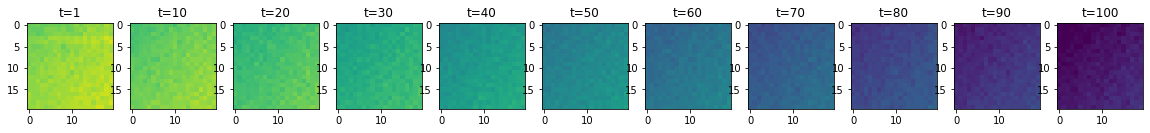

In [18]:
fig1 = plt.figure(figsize = [20, 15])

plot_gpr(gpr, 1, fig1, [1, 11, 1])
plot_gpr(gpr, 10, fig1, [1, 11, 2])
plot_gpr(gpr, 20, fig1, [1, 11, 3])
plot_gpr(gpr, 30, fig1, [1, 11, 4])
plot_gpr(gpr, 40, fig1, [1, 11, 5])
plot_gpr(gpr, 50, fig1, [1, 11, 6])
plot_gpr(gpr, 60, fig1, [1, 11, 7])
plot_gpr(gpr, 70, fig1, [1, 11, 8])
plot_gpr(gpr, 80, fig1, [1, 11, 9])
plot_gpr(gpr, 90, fig1, [1, 11, 10])
plot_gpr(gpr, 100, fig1, [1, 11, 11])

In [19]:
# a random set of 20 locations to fit kriging model for all points
kriging_locations = np.array([np.array([4, 2]), np.array([18, 18]), np.array([0, 19]), np.array([14, 4]), np.array([15, 0]), np.array([12, 1]), np.array([6, 13]), np.array([9, 15]),np.array([6, 14]), np.array([19, 9]),
                 np.array([10, 19]), np.array([15, 17]), np.array([8, 17]), np.array([5, 10]), np.array([13, 18]), np.array([14, 6]), np.array([5, 19]), np.array([11, 7]), 
                 np.array([6, 2]), np.array([10, 3])])


In [20]:
def plot_krige (z, time, fig, coords):
    if fig:
        ax = fig.add_subplot(*coords)
    else:
        ax = plt.axes()
    ax.imshow(np.array(z), cmap = 'viridis', vmin = -150, vmax = 50)
    ax.set_title('t={}'.format(time))

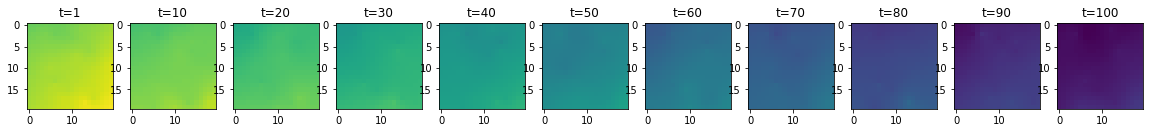

In [21]:
fig2 = plt.figure(figsize = [20, 15])

for index, time in enumerate([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]):
    vals = gpr.sample_y(list(map(lambda loc: [*loc, time], kriging_locations)))
    UK = UniversalKriging(kriging_locations[:, 0], kriging_locations[:, 1], vals, variogram_model = "linear", drift_terms = ["regional_linear"])
    z, ss = UK.execute("grid", np.arange(0.0, 20.0, 1.0), np.arange(0.0, 20.0, 1.0))
    plot_krige(z, time, fig2, [1, 11, index + 1])

#Estimates of value using Kriging Model
    

In [22]:
# Taking 5 random spatial locations and 5 random temporal points
spatial_locs = [np.array([13, 8]), np.array([7, 4]), np.array([10, 19]), np.array([15, 2]), np.array([1, 11])]
temporal_locs = np.array([ 31, 21, 75, 51, 99 ])

In [23]:
def plot_gprt (gpr_model, time, fig, coords):
    z_axis = []
    for x in range(20):
        row = list(map(lambda r: r[0], gpr_model.sample_y(list(map(lambda y: np.array([x, y]), range(20))))))
        z_axis.append(row)

    if fig:
        ax = fig.add_subplot(*coords)
    else:
        ax = plt.axes()
    ax.imshow(np.array(z_axis), cmap = 'viridis', vmin = 0, vmax = 120)
    ax.set_title('t={}'.format(time))

def new_cell_val (x, y, t):
    return x + y + t / 2 + random.uniform(0, 10) #X(s, t) = s1 + s2 + 0.5t + ϵ  to initiate value by spacio temporal process according to problem statement

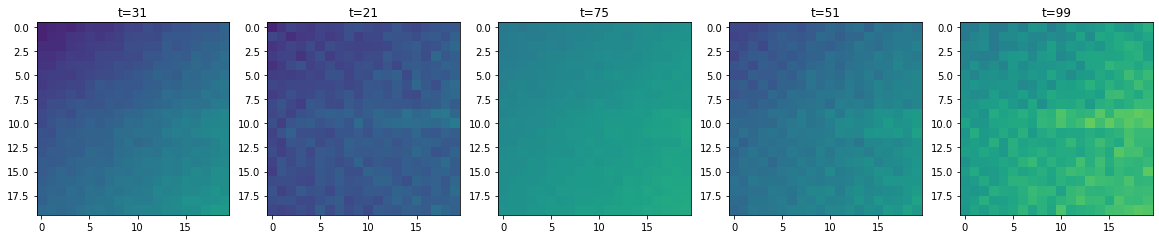

In [24]:
fig4 = plt.figure(figsize = [20, 5])

for index, time in enumerate(temporal_locs):
    gprt = GaussianProcessRegressor(kernel = DotProduct() + WhiteKernel()).fit(spatial_locs, list(map(lambda loc: new_cell_val(*loc, time), spatial_locs))) 
    #using spatio-temporally separable Gaussian Processes (i.e. decompose as a product of two GPs – one spatial and one temporal)
    plot_gprt(gprt, time, fig4, [1, 5, index + 1])



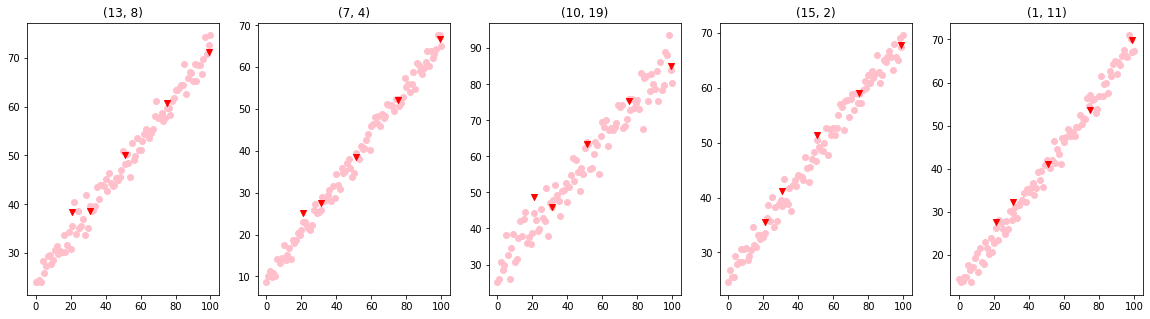

In [25]:
def plot_gprs (gpr_model, space, fig, coords, mapped):
    x_axis = range(101)
    y_axis = list(map(lambda r: r[0], gpr_model.sample_y(np.array(range(101)).reshape(-1, 1))))
    if fig:
        ax = fig.add_subplot(*coords)
    else:
        ax = plt.axes()
    ax.scatter(x_axis, np.array(y_axis), color = 'pink')
    ax.set_title('({}, {})'.format(*space))
    ax.scatter(temporal_locs, mapped, marker = 'v', color = 'red')
    
fig5 = plt.figure(figsize = [20, 5])

for index, space in enumerate(spatial_locs):
    mapped = list(map(lambda loc: new_cell_val(*space, loc), temporal_locs))
    gprs = GaussianProcessRegressor(kernel = DotProduct() + WhiteKernel()).fit(temporal_locs.reshape(-1, 1), mapped)
    plot_gprs(gprs, space, fig5, [1, 5, index + 1], mapped)